* # VAMOS A HACER UN ANÁLISIS GENERAL Y EXPLORATORIO SOBRE UN BANCO.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
### Carga de datos
data = pd.read_csv("./bank-full.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* Contenemos 45211 datos, es decir "Usuarios". son valores numericos y descriptivos.
* El DataSet tiene un tamaño de 6MB
* Podemos aprovechar que tenemos un DataSet grande y con muchos datos a hacer unas predicciones buenas.
* Estan todos los nombres en "Ingles" y habria que cambiarlo al castellano
---

* ### Cambio de nombre a las columnas del DataSet

In [4]:
data = data.rename(columns={"age":"edad" , "job":"trabajo","marital":"estado_civil","education":"educacion",
                            "default":"incumplimiento_de_pago","balance":"saldo_actual","housing":"hipoteca_prestamo","loan":"prestamo",
                            "contact":"contacto","day":"dia","month":"mes","duration":"duracion_ult_llamada","campaign":"campaña",
                            "pdays":"dias_ult_contacto","previous":"contacto_previo","poutcome":"campaña_anterior"})

----
* # Grafica de los datos (Descriptivos)

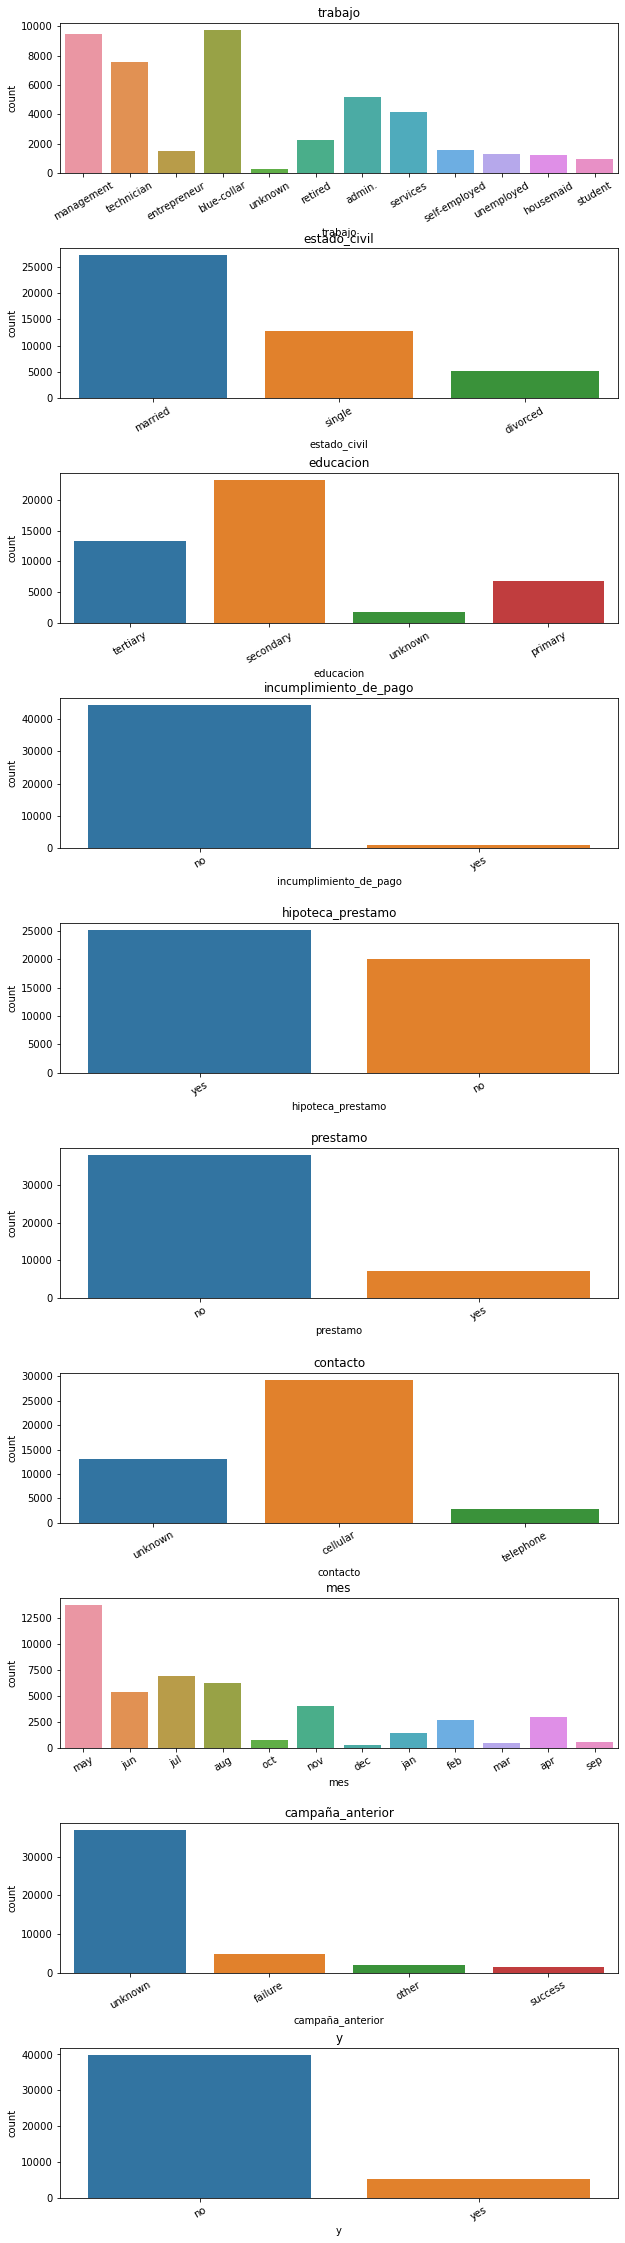

In [5]:
data_desc = ["trabajo","estado_civil","educacion","incumplimiento_de_pago","hipoteca_prestamo","prestamo",
             "contacto","mes","campaña_anterior","y"]

fig, ax = plt.subplots(nrows=len(data_desc),ncols=1,figsize=(10,40))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(data_desc):
    sns.countplot(x=col , data=data , ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

* ## OBSERVACIÓN


* **Trabajo** = Contiene el data set 12 tipos de trabajo, los que mas se destacan son 3 (management,technician y blue-collar).
* **Estado civil** = Contiene los 3 tipos de estado civil (casado/a , soltero/a , divorciado/a).
* **Educación** = Tenemos 4 tipos de educación. (terciario,secundaria,primaria y desconocida) el que se destaca mas es secundaria y luego terciaria.
* **Incumplimiento de pago** = Tenemos SI y NO (predomina por una unimidad el "NO".
* **Hipoteca prestamos** = Tenemos también SI y NO (tenemos una igualdad).
* **Prestamo** = Tenemos también entre SI y NO (es mucho mayor el NO).
* **Contacto** = Como se lo contacto al usuario (telefono, celular y desconocido).
* **Mes en cual fue contacado** =  el mes en el cual los usuarios fueron contacados es en MAYO.
* **Campaña anterior** = Como fue la campaña anterior ( desconocido, fallida , otra , exitosa).
* **"Y"** = Si adiquirio el prestamo o no. La mayoria no lo tomo. Luego veremos que porcentaje es.

----

---
* # Exploramos los datos numericos y graficamos

In [6]:
data.describe()

,edad,saldo_actual,dia,duracion_ult_llamada,campaña,dias_ult_contacto,contacto_previo
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* ## OBSERVACIÓN

* **EDAD** = La edad media que tenemos es de 41 años 
* **Saldo actual de los usuarios** = La mnedia de los sueldo en los usuarios es de 1362
* **DIA** = Dia de contacto medio es el 15
* **Duracion de la ultima llamada con el usuario** = La media de la ultima llamada u contacto con el usuario es de 258 Seg
* **CAMPAÑA** = La media Resultado de la campaña actual es de 2,7
* **Dias sobre el ultimo concato con el usuario** = la media de dias sobre su ultimo contacto con el usuario es de 40
* **Contacto previo a la campaña acutal** = La media de cuantas veces el usuariop fue contacato por la campaña actual es de 0.5
----

* ## Graficamos para que se entienda mejor como se comportan los datos numericos

<AxesSubplot:xlabel='contacto_previo', ylabel='Count'>

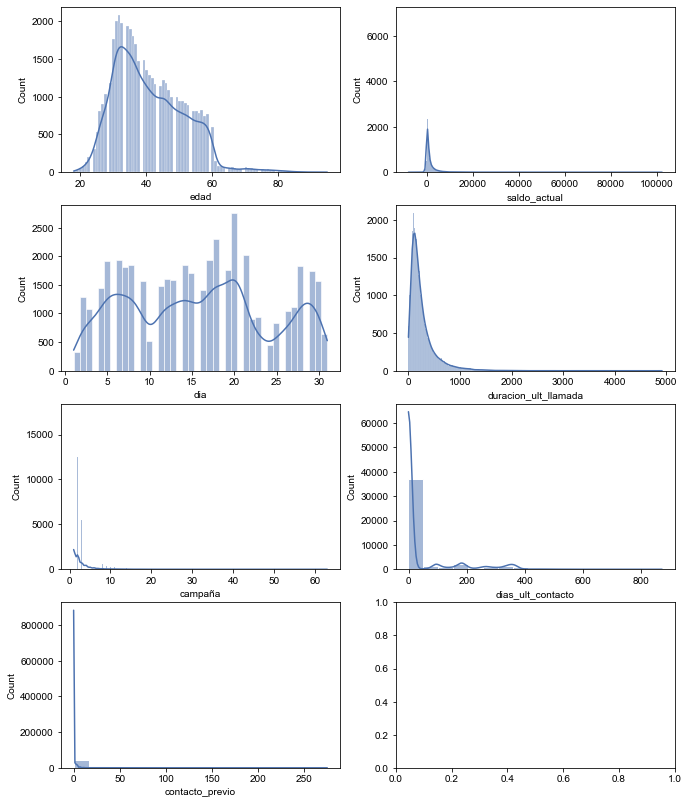

In [7]:
### Creamos una serie de subplots para graficarlo uno por uno

fig,ax = plt.subplots(4,2,figsize=(11,14))
sns.set(font_scale =1)
sns.histplot(data['edad'],kde=True,ax=ax[0,0])
sns.histplot(data['saldo_actual'],kde=True,ax=ax[0,1])
sns.histplot(data['dia'],kde=True,ax=ax[1,0])
sns.histplot(data['duracion_ult_llamada'],kde=True,ax=ax[1,1])
sns.histplot(data['campaña'],kde=True,ax=ax[2,0])
sns.histplot(data['dias_ult_contacto'],kde=True,ax=ax[2,1])
sns.histplot(data['contacto_previo'],kde=True,ax=ax[3,0])

In [8]:
#### Veremos si el data set contiene algunos que otros datos N/A
print(data.isna().sum())
### que nos diga cuantas filas y columnas componen el dataset
print(f"Numeros de filas{data.shape}columnas")

edad                      0
trabajo                   0
estado_civil              0
educacion                 0
incumplimiento_de_pago    0
saldo_actual              0
hipoteca_prestamo         0
prestamo                  0
contacto                  0
dia                       0
mes                       0
duracion_ult_llamada      0
campaña                   0
dias_ult_contacto         0
contacto_previo           0
campaña_anterior          0
y                         0
dtype: int64
Numeros de filas(45211, 17)columnas


----
* ## Seguimos con el análisis de los datos numericos viendos su "CORRELACIÓN"

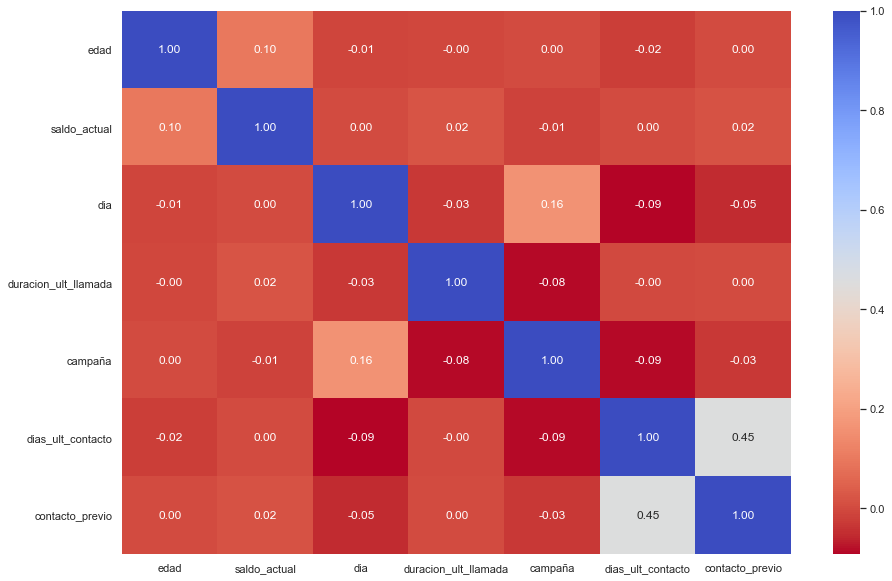

In [9]:
correlacion = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacion, annot=True , fmt=".2f" , cmap=plt.cm.coolwarm_r)
plt.show()

* ### Se observa que entre los numeros tenemos todas correlaciones muy bajas o negativas. La unica positiva y medianamente buena es la columna del "Contacto previo" y "Dias de el ultimo contacto".
----

* ### Pasaremos a numerico el valor de "Y" (si adiquirio el producto o no)

In [10]:
dummy_y = pd.get_dummies(data["y"], prefix="y")

In [11]:
dic = {"yes":1 , "no":0}
binario = data["y"].map(dic)
data["y_bin"] = binario

------
* # Como por ultimo del análisis general y exploratorio antes de las predicciones. Veremos y análisaremos si existe alguna relación entre las posibles variables predictoras. (Que es lo que mas influyo y si tiene alguna diferencia de cuando el usuario adquirio o no el producto)

In [12]:
col_num = ["edad","saldo_actual","dia","duracion_ult_llamada","campaña","dias_ult_contacto","contacto_previo"]
num_cols = len(col_num)

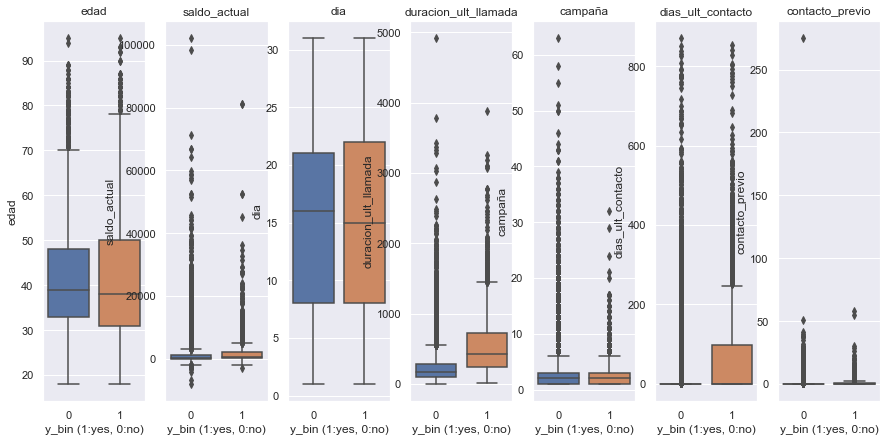

In [13]:
fig,ax= plt.subplots(nrows=1, ncols=7, figsize=(15,7))
fig.subplots_adjust(hspace=.35)

for i, col in enumerate (col_num):
    bplt = sns.boxplot(x="y_bin",y=col,data=data, ax=ax[i])
    ax[i].set_xlabel("y_bin (1:yes, 0:no)")
    ax[i].set_title(col)

* ## Observación


* En los rangos de **EDAD** es casi muy similar.
* En el **SALDO ACTUAL** y el **DIA** es el mismo caso que en la edad. Son similares
* **DURACION DE ULT LLAMADA** hay unos leves minutos de diferencia con los que si aceptaron el producto y no.
* **CAMPAÑA** Es similar en ambos aspecto, tanto en si como no
* **DIAS DEL ULT CONTACTO CON USUARIOS** hay diferencia bastante grande con los usuarios que si adquirieron el producto con los que no.

* **CONTACTO PREVIO** es similar en ambos aspectos

---

* # CONTINUAMOS CON LAS COMPARACIONES Y LAS RELACIONES CON LOS USUARIOS QUE ADQUIRIERON EL PRODUCTO.



* Convertir los clientes que adquirieron el producto y ver si tienen diferencias entre si, para luego ver cual es buena variable y poder usarla en la prediccion que haremos al final.

In [14]:
#### Creamos una funcion para haver las conversión
def graficar_tasas_conversion(var_predictora , var_predecir, type="line", order=None):
    x,y = var_predictora ,  var_predecir
    
    #generar agrupaciones,caclulcar tasa, multiplicar el % por 100 
    grupo= data.groupby(x)[y].mean().mul(100).rename("tasa_conv").reset_index()
    
    if type=="line":
        plt.figure(figsize=(10,7))
        sns.lineplot(x=var_predictora, y="tasa_conv", data=grupo)
        plt.grid()
    elif type=="bar":
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y="tasa_conv", data=grupo, order=order)
        plt.grid()
    elif type=="scatter":
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y="tasa_conv" , data=grupo)
        plt.grid()

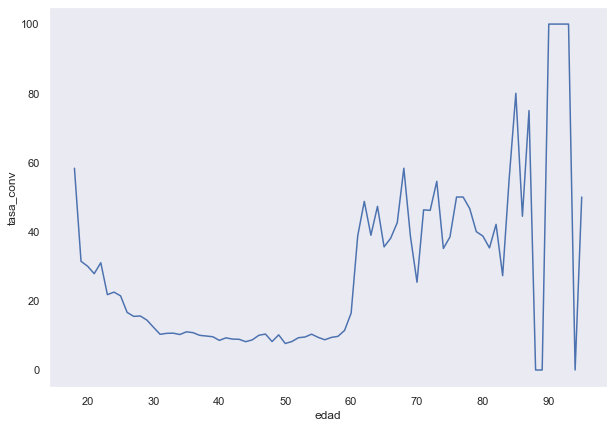

In [15]:
graficar_tasas_conversion("edad","y_bin")

**Observación**

* Observamos diferencias en las tasas de conversión por edad
* Se puede ver que hay 3 rangos altos, pero hay uno que sobresale mas que los otros dos que se encuentra en el rango de 89-94
* Lo que si vamos a hacer es establecer 3 tipos de rangos: 18-31 años , 32-62 años y 63 en adelante
-------

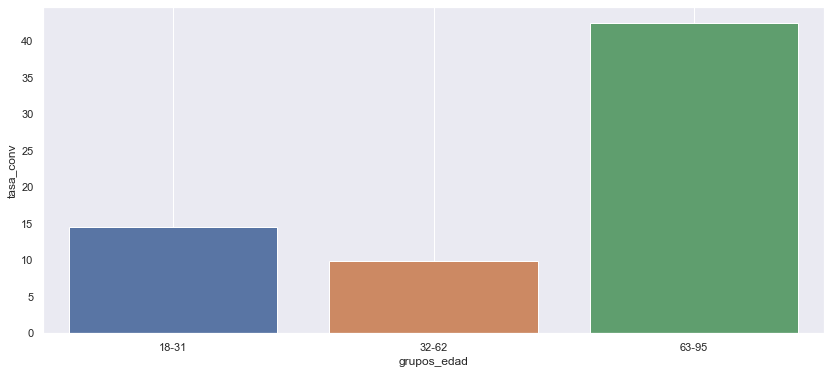

In [16]:
#### Creamos el grupo y las columnas en el dataset
data.loc[:,"grupos_edad"] = "18-31"
data.loc[(data["edad"]>32)&(data["edad"]<62), "grupos_edad"] = "32-62"
data.loc[data["edad"]>63, "grupos_edad"] = "63-95"

#### Graficamos 
graficar_tasas_conversion("grupos_edad" , "y_bin" , type="bar")

* **GRUPOS DE EDAD - Observación**


* La tasa promedio del rango entre 18-31 años el promedio es del 14%
* La tasa promedio del rango entre 32-62 años es casi del 10% (es la menor)
* La tasa promedio desde 60 en adelante es del 45% (la mayor tasa de conversión)
* **Es una muy buena variable predictora**
-----

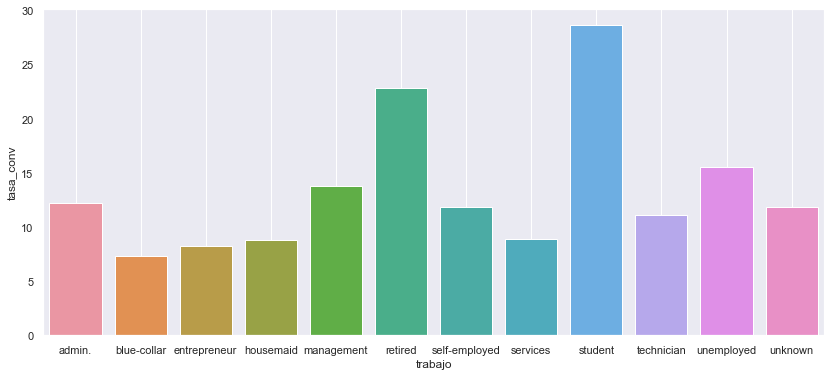

In [17]:
graficar_tasas_conversion("trabajo" , "y_bin" , type="bar")

* **TRABAJOS - observaciones**


* La tasa de conversión estan entre el 7% y el 29%.
* Los mayores porcentaje lo tienen los estudiantes con el 29% junto con los jubilados que tienen el 23%.
* Los que lo siguen son los desempleados con el 15% y luego los de gestion de empresas 14%.
* La conclusión es que "TRABAJOS" puede ser una variable predictora muy buena.
----

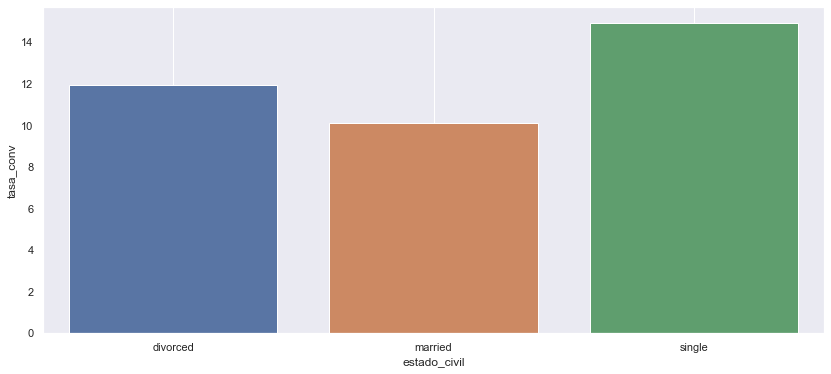

In [18]:
graficar_tasas_conversion("estado_civil" , "y_bin" , type="bar")

* **ESTADO CIVIL - Observaciones**


* Las personas solteras tienden a tener un porcentaje apenas mas alto en adquirir el producto (puede ser entre %2 y %4 de diferencia)
----

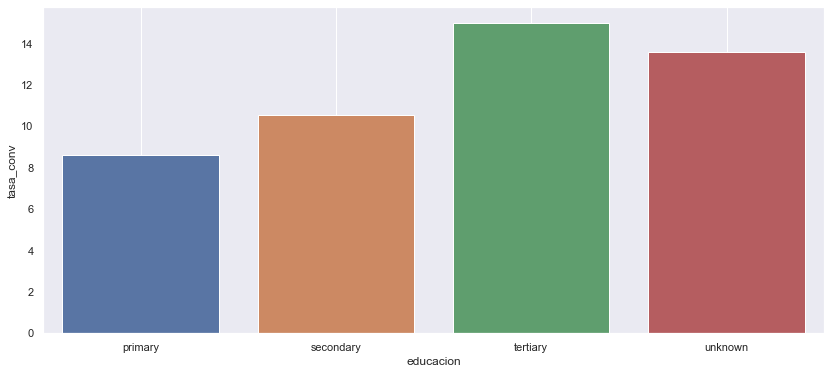

In [19]:
graficar_tasas_conversion("educacion" , "y_bin" , type="bar")

* **EDUCACION - Observacion**


* Podemos observar que a mayor nivel educativo la probabilidad de que adiquiera el producto es mayor.(en teoria esto es entendible por que si mayor es su nivel educativo mayor va a ser su poder adquisitivo por el tema del trabajo)
* Es una buena variable predictora.
----

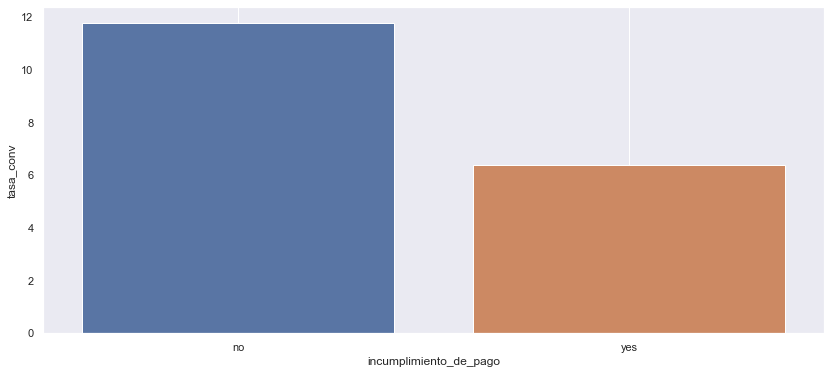

In [20]:
graficar_tasas_conversion("incumplimiento_de_pago" , "y_bin" , type="bar")

* **INCUMPLIMIENTO DE PAGO - Observaciones**


* Se observa que la gente que no tiene incumplimiento de pago adquiere mucho mas el prestamo (La deferencia es del doble).
* Es una muy buena variable predictora.
----

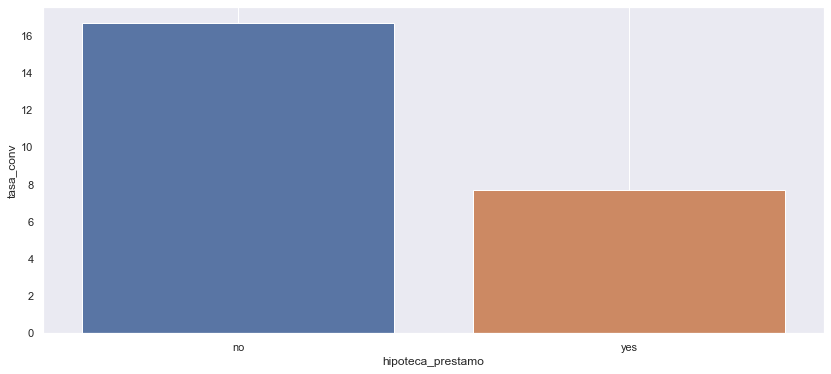

In [21]:
graficar_tasas_conversion("hipoteca_prestamo" , "y_bin" , type="bar")

* **HIPOTECA DE PRESTAMO - Observaciones**


* Vemos que la gente que no tiene una hipoteca adquiere mucho mas el producto.
* Es una muy buena variable predictora.
----

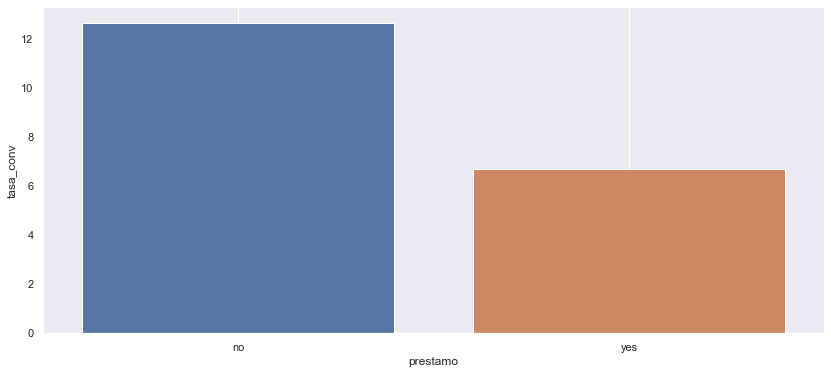

In [22]:
graficar_tasas_conversion("prestamo" , "y_bin" , type="bar")

* **PRESTAMO - Observaciones**


* Lo mismo que en las hipotecas, los usuarios que no tienen otro tipo de prestamo adquieren el prestamo (con la misma diferencia que hay en hipoteca, el doble)
* Muy buena variable predictora

----

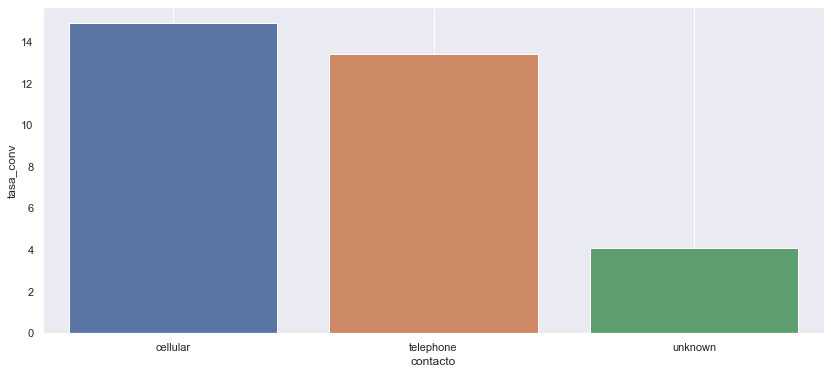

In [23]:
graficar_tasas_conversion("contacto" , "y_bin" , type="bar")

* **COMO SE LO CONTACTÓ - Observaciones**


* Se observa que apenas los usuarios contactados por el celular adquieren mas el prestamo.
----

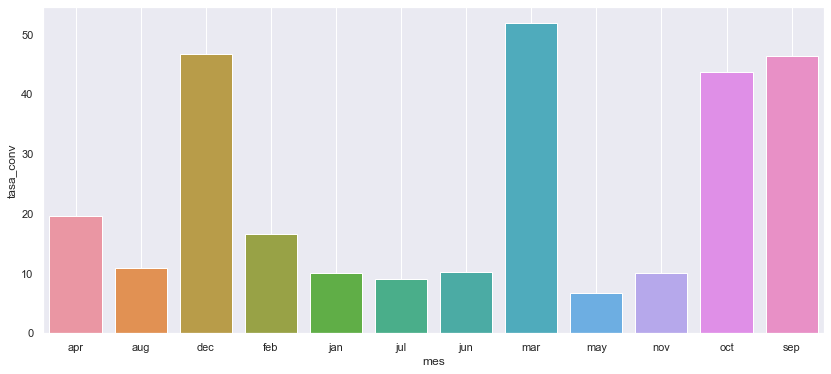

In [24]:
graficar_tasas_conversion("mes" , "y_bin" , type="bar")

* **MESES EN CUAL SE CONTACTO AL USUARIO - Observaciones**


* Tenemos 4 meses en los cuales los usuarios adquirieron el prestamo. **Diciembre - Marzo - Octubre - Septiembre** 
* Se puede decir que llamar a fin de año es mas alto el porcentaje que el usuario adquiera el prestamo.
---

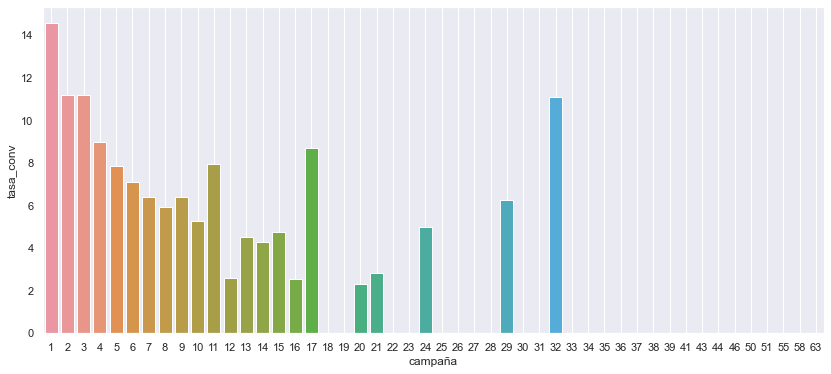

In [25]:
graficar_tasas_conversion("campaña" , "y_bin" , type="bar")

* **CANTIDAD DE VECES QUE SE LO CONTACTO EN LA CAMPAÑA - Observaciones**


* Podemos ver las veces que el usuario que adquirio el prestamo fue contactado mayormente 1 vez. lo siguen 2 , 3 y 32 veces
* Se puede tener en cuenta para que sea una variable predictora.
----

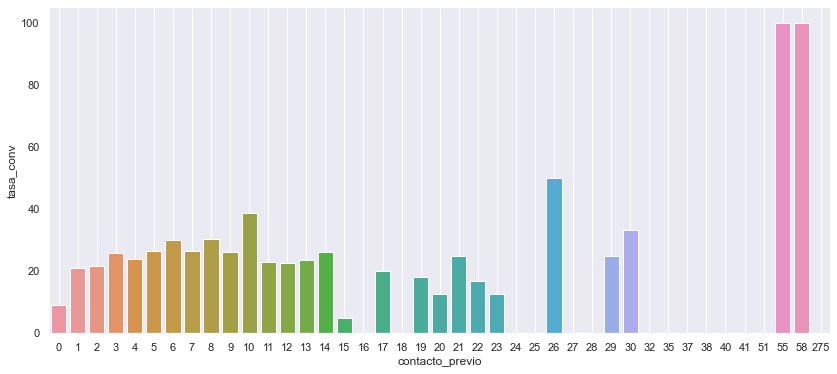

In [26]:
graficar_tasas_conversion("contacto_previo" , "y_bin" , type="bar")

* **CONTACTO PREVIO AL USUARIO - Observaciones**


* Al parecer a los usuarios que se lo contacto entre 55 y 58 veces adquirieron el prestamo.
* Puede ser que esta variable signifique las veces que se lo contacto por llamada,email,mensajes u red social.
----

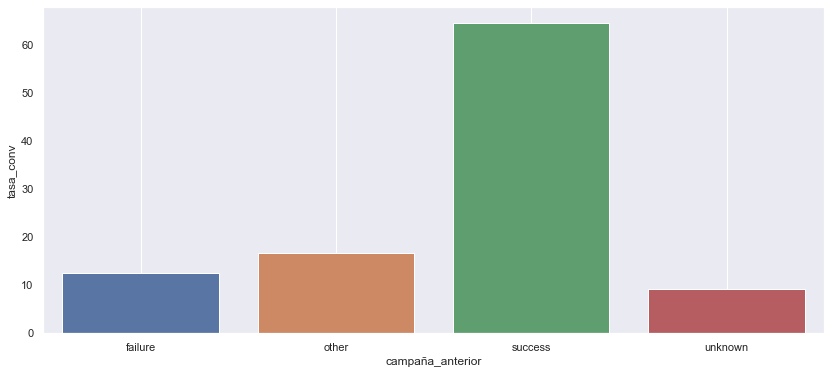

In [27]:
graficar_tasas_conversion("campaña_anterior" , "y_bin" , type="bar")

* **CAMPAÑA ANTERIOR - Observaciones**


* Se observa que los usuarios que adquirieron el producto en la anterior campaña, Lo adquirieron nuevamente en esta campaña.
* Es una muy buena variable predictora.
---

---
* # Creamos 3 tipos de datasets y dumificamos

In [28]:
data_desc = ["trabajo" , "estado_civil" , "educacion" , "incumplimiento_de_pago" , "hipoteca_prestamo" , "prestamo",
                 "contacto","mes","campaña_anterior"]

data_num = data[["edad" , "saldo_actual" , "dia" , "duracion_ult_llamada" , "campaña" , "dias_ult_contacto" ,
                 "contacto_previo"]]

In [29]:
data_dummy = pd.get_dummies(data[data_desc], drop_first=True)

In [30]:
data_dummy.head()

,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,trabajo_management,trabajo_retired,trabajo_self-employed,trabajo_services,trabajo_student,trabajo_technician,trabajo_unemployed,...,mes_jul,mes_jun,mes_mar,mes_may,mes_nov,mes_oct,mes_sep,campaña_anterior_other,campaña_anterior_success,campaña_anterior_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   trabajo_blue-collar         45211 non-null  uint8
 1   trabajo_entrepreneur        45211 non-null  uint8
 2   trabajo_housemaid           45211 non-null  uint8
 3   trabajo_management          45211 non-null  uint8
 4   trabajo_retired             45211 non-null  uint8
 5   trabajo_self-employed       45211 non-null  uint8
 6   trabajo_services            45211 non-null  uint8
 7   trabajo_student             45211 non-null  uint8
 8   trabajo_technician          45211 non-null  uint8
 9   trabajo_unemployed          45211 non-null  uint8
 10  trabajo_unknown             45211 non-null  uint8
 11  estado_civil_married        45211 non-null  uint8
 12  estado_civil_single         45211 non-null  uint8
 13  educacion_secondary         45211 non-null  uint8
 14  educac

----
* # PREDICCIONES

----
* ## Regresión Lineal - valores descriptivos

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
X = data_dummy
y = dummy_y

lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [34]:
lm.score(X,y)*100

15.994960302893679

* ### Resultado muy bajo, solamente un %16 de eficacia.
---

----
* # Regresión Lineal - valores Numericos

In [35]:
X = data_num
y = dummy_y

lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [36]:
lm.score(X,y)*100

17.252365945838612

* ### El resultado con la regresión lineal a base de datos numericos es apenas mejor, pero sigue siendo muy malo 17.25%
---

---
* # ARBOL DE REGRESION CON LAS VARIABLES NUMERICAS Y CATEGORICAS DUMIFICADAS (las variables pasadas a valores numericos)

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [38]:
data_dummy = pd.concat([data_num, data_dummy], axis=1)

In [39]:
X = data_dummy
y = y_bin = data[["y_bin"]]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42)

In [41]:
regtree = DecisionTreeRegressor(min_samples_split=150, min_samples_leaf=150, max_depth=7)

In [273]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=150, min_samples_split=150)

In [274]:
y_pred = regtree.predict(X_test)

In [275]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [276]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [277]:
print("Coeficiente de determinación (R^2):", r2_score(y_test, y_pred))
print("Error absoluto medio (MAE):", mean_absolute_error(y_test, y_pred))
print("Error cuadrado medio (MSE):", mean_squared_error(y_test, y_pred))

Coeficiente de determinación (R^2): 0.29426754185680093
Error absoluto medio (MAE): 0.14476999625493414
Error cuadrado medio (MSE): 0.07334834233782264


* ## Obtenemos unos resultados mejor que con el modelo de regresión lineal, pero aún asi siguen siendo algo bajos
* ## tenemos una eficacia de %30 con un MAE y un MSE que eso si son algo buenos, pero hay que probar con otros tipos de modelos para ver como funcionan y si se ajustan mejor
----


-----
* # ÁRBOL DE DECISION.Con todas las variables categoricas dumificadas y datos numericos.

In [584]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [585]:
####Creamos el arbol de decision.

tree = DecisionTreeClassifier(criterion="entropy" , min_samples_split=70 , max_depth=50
                              ,min_samples_leaf=70, random_state=42)

In [586]:
tree.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=70,
                       min_samples_split=70, random_state=42)

In [587]:
# Hacer predicciones con los datos de prueba
y_pred_tree = tree.predict(X_test)

In [588]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_tree)

In [589]:
# Calcular la matriz de confusión y el reporte de clasificación
matrix_conf = confusion_matrix(y_test, y_pred_tree)
class_report = classification_report(y_test, y_pred_tree)

In [590]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred_tree)
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred_tree)

# Imprimir los resultados
print("Error Absoluto Medio (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)

Error Absoluto Medio (MAE): 0.10405838770319584
Error Cuadrático Medio (MSE): 0.10405838770319584


In [591]:
print("Precisión del modelo:", accuracy)
print("\nMatriz de confusión:")
print(matrix_conf)
print("\nReporte de clasificación:")
print(class_report)

Precisión del modelo: 0.8959416122968041

Matriz de confusión:
[[7640  312]
 [ 629  462]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.60      0.42      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.69      0.72      9043
weighted avg       0.88      0.90      0.89      9043



In [592]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(tree, X_train, y_train, cv=15)

# Calcular el promedio de la eficacia obtenida en cada fold
mean_cv_score = cv_scores.mean()

# Imprimir el resultado de la validación cruzada
print("Eficacia promedio con validación cruzada con los datos de entrenamiento:", mean_cv_score)

Eficacia promedio con validación cruzada con los datos de entrenamiento: 0.9011835036532165


-----
### CREAMOS UNA VALIDACIÓN CRUZADA PARA CORROBORAR EL FUNCIONAMIENTO Y EFICACIA DEL MODELO EN GENERAL.

In [593]:
tree = DecisionTreeClassifier(criterion="entropy" , max_depth=10,  min_samples_split=50, random_state=42)
tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=50,
                       random_state=42)

In [594]:
cv4 = KFold(n_splits=30, shuffle=True, random_state=42)
score4 =np.mean(cross_val_score(tree,X,y,scoring="accuracy", cv=cv4 , n_jobs=1))
score4

0.8986528678134518

* ### Creamos una validazion cruzada de 30 grupos y el resultado es el PROMEDIO de la eficacia obtenida en cada uno de los FOLDS(las divisiones del arbol).
* ### 89,86% es un valor excelente. Tiene una eficacia muy buena.
----

---
# RANDOM FOREST

In [595]:
from sklearn.ensemble import RandomForestClassifier

In [596]:
# Hacer predicciones con todos los datos para agregarlo al dashboard
y_pred_all = regtree.predict(X)

In [597]:
data["y_prediccion"] = y_pred_all

In [598]:
eficacia_general = regtree.score(X, y)
print("Eficacia general del modelo (R^2):", eficacia_general)

# Calcular el Error Absoluto Medio (MAE)
mae_all = mean_absolute_error(y, y_pred_all)

# Calcular el Error Cuadrático Medio (MSE)
mse_all = mean_squared_error(y, y_pred_all)

# Imprimir los resultados
print("Error Absoluto Medio (MAE):", mae_all)
print("Error Cuadrático Medio (MSE):", mse_all)

Eficacia general del modelo (R^2): 0.3094330269521901
Error Absoluto Medio (MAE): 0.1420922164589013
Error Cuadrático Medio (MSE): 0.07133512640797499


In [599]:
X = data_dummy
y = data["y_bin"]

#### Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [600]:
#### Creamos el modelo de Random Forest
random_forest = RandomForestClassifier(criterion="entropy",n_estimators=30,max_depth=30,
                                       min_samples_split=50 ,min_samples_leaf=50,random_state=42)

In [601]:
#### Entrenamos el modelo con los datos de entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=30, random_state=42)

In [602]:
### Realizamos las predicciones con los datos de prueba
forest_y_pred = random_forest.predict(X_test)

In [603]:
### Calcular la precisión del modelo
accuracy = accuracy_score(y_test, forest_y_pred)

In [604]:
#### Calcular la matriz de confusión y el reporte de clasificación
matrix_conf = confusion_matrix(y_test, forest_y_pred)
class_report = classification_report(y_test, forest_y_pred)

In [605]:
##### Imprimir los resultados
print("Precisión del modelo:", accuracy)
print("\nMatriz de confusión:")
print(matrix_conf)
print("\nReporte de clasificación:")
print(class_report)

Precisión del modelo: 0.8930664602454937

Matriz de confusión:
[[7894   58]
 [ 909  182]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.76      0.17      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.83      0.58      0.61      9043
weighted avg       0.88      0.89      0.86      9043



In [606]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(random_forest, X_test, y_test, cv=5)

# Calcular el promedio de la eficacia obtenida en cada fold
mean_cv_score = cv_scores.mean()

# Imprimir el resultado de la validación cruzada
print("Eficacia promedio con validación cruzada:", mean_cv_score)

Eficacia promedio con validación cruzada: 0.8879791675839094


In [607]:
cv4 = KFold(n_splits=30, shuffle=True, random_state=42)
score4 =np.mean(cross_val_score(random_forest,X,y,scoring="accuracy", cv=cv4 , n_jobs=1))
score4

0.896153787482758

* ## Tenemos en si el mismo resultado en la validacion cruzada tanto en el Árbol de decisión y el random forest.
----

# RESULTADOS EN AMBOS CASOS:

* ## Resultados de efectividad: %89,50(%90)Árbol y 89.30 RandomForest
    * ### El árbol de decisión es apenas mas altp, en este caso tienen una similitud.



* ## El recall (también conocido como sensibilidad o tasa de verdaderos positivos)en este caso clientes que obtuvieron el crédito RESULTADO BUENO para el ÁRBOL DE DECISIÓN y muy bajo para el RANDOM FOREST.



* ## El f1-score es una métrica que combina el recall y la precisión (1 para su mejor valor y 0 para su peor valor) RESULTADO ALGO BUENO para el ÁRBOL DE DECISIÓN y nuevamente bajo para el RANDOM FOREST.


* ## El support representa el número de instancias en cada clase en el conjunto de prueba. Es útil para tener una idea de cuántas instancias de cada clase hay en los datos y si hay un desequilibrio entre las clases. EN AMBOS CASOS HAY SIMILITUD NUEVAMENTE


* ## Con estos resultados sugieren que el modelo de clasificación que construimos es bastante preciso y tiene un buen rendimiento en la tarea de clasificación. Clasifica mucho mejor para los clientes que no van a adquirir el prestamo, tiene mucha mayor efectividad comparandolos con los que posiblemente quieran adquirir dicho producto. El MAE Y MSE son también bajos y eso es muy bueno.

-----


# RESUMEN DE LOS RESULTADOS MAS ALTOS PARA QUE SE ENTIENDA MEJOR CADA PUNTO


* # Precision:
### La precisión es la proporción de instancias clasificadas como positivas (obtuvo el crédito) que son realmente positivas. En este caso, para la clase "0", la precisión es del 90%, lo que indica que el 93% de las veces que el modelo predijo "0", acertó. Para la clase "1", la precisión es del 73%, lo que significa que el 73% de las veces que el modelo predijo "1", acertó.--------- RANDOM FOREST*
----

* # Recall (Sensibilidad): 
### El recall es la proporción de instancias positivas (obtuvo el crédito) que fueron correctamente clasificadas por el modelo. Para la clase "0", el recall es del 96%, lo que indica que el modelo identifica correctamente el 96% de las instancias que pertenecen a la clase "0". Para la clase "1", el recall es del 42%, lo que significa que el modelo identifica correctamente el 44% de las instancias que pertenecen a la clase "1".--------ÁRBOL DE DECISIÓN
----

* # F1-score:
### El F1-score es una métrica que combina la precisión y el recall en una sola medida. Es útil cuando hay un desequilibrio entre las clases. Un F1-score más alto indica un mejor equilibrio entre la precisión y el recall. Para la clase "0", el F1-score es del 0.94, y para la clase "1", es del 0.50.--------ÁRBOL DE DECISIÓN
---

* ## En resumen, estos resultados indican que el modelo tiene un buen desempeño en la clasificación de la clase "0" (no obtuvo el crédito), con alta precisión y recall. Sin embargo, en la clasificación de la clase "1" (obtuvo el crédito), el modelo muestra una precisión relativamente buena-muy baja y un recall bajo, lo que sugiere que el modelo tiene dificultades para identificar correctamente las instancias que pertenecen a la clase "1" pero casi excelentes pasa la clase "0".

----
# RESUMEN FINAL

* ## Podemos ver que que tiene una taza de acierto muy buena de un %98.86 .Se puede decir tiene errores minimo al predecir.

* ## Tanto como en el entrenamiento y test obtuvimos un %90.01 de acierto


* ## Teniendo en cuenta también los resultados excelentes de los valores de MAE y MSE.
    * ## El MAE (Mean Absolute Error) es la diferencia promedio absoluta entre las predicciones y los valores reales, mientras que el MSE (Mean Squared Error) es el promedio de los errores al cuadrado entre las predicciones y los valores reales.
    * ## MSE = 0.09 
    * ## MAE = 0.09


---
----
----




* # También tengamos en cuenta el análisis exploratorio sobre las variables "mas importantes" a tener en cuenta para saber si el cliente puede adquirir el prestamo o no. Es decir las variables mas importantes a tener en cuenta: 
    * ## GRUPOS DE EDAD.
    * ## TIPOS DE TRABAJOS.
    * ## NIVEL DE EDUCACIÓN.
    * ## SI TIENE IMCUMPLIMIENTO DE PAGO O NO.
    * ## SI TIENE UN PRESTAMO HIPOTECARIO.
    * ## ALGUN TIPO DE OTRO PRESTAMO.
    * ## MES EN CUAL SE LO CONTACTA AL USUARIO PARA OFRECERLE EL PRODUCTO.
    * ## SI TUVO EXITO O NO EN LA CAMPAÑA ANTERIOR.

------
# PARA EL DASHBOARD USAREMOS LOS RESULTADOS DEL ÁRBOL DE DECISIÓN POR SU RESULTADO UN POCO MEJOR EN LA PREDICCIÓN PARA LA CLASE "1".

In [608]:
y_pred_tree = regtree.predict(X)

In [626]:
data["y_prediccion"] = y_pred_tree

In [627]:
# Convertir las predicciones en valores binarios usando un umbral de 0.5
y_pred_binary = (y_pred_tree >= 0.5).astype(int)

# Agregar las predicciones binarias a data_dummy como una nueva columna llamada "y_prediccion"
data["y_prediccion"] = y_pred_binary

In [628]:
# Calcular el accuracy
accuracy_all = accuracy_score(y, y_pred_binary)

# Calcular el Error Absoluto Medio (MAE)
mae_all = mean_absolute_error(y, y_pred_binary)

# Calcular el Error Cuadrático Medio (MSE)
mse_all = mean_squared_error(y, y_pred_binary)

# Imprimir los resultados
print("Accuracy:", accuracy_all)
print("Error Absoluto Medio (MAE):", mae_all)
print("Error Cuadrático Medio (MSE):", mse_all)

Accuracy: 0.9015726261308089
Error Absoluto Medio (MAE): 0.09842737386919112
Error Cuadrático Medio (MSE): 0.09842737386919112


In [631]:
data.to_excel("Analisis_banco_bank.xlsx")

* # LINK DEL DASHBOARD:
https://www.novypro.com/project/%F0%9F%8F%A6-an%C3%A1lisis-exploratorio-estad%C3%ADstico-y-predictivo-sobre-45000-clientes-de-un-banco-posible-cliente-en-adquirir-un-prestamos-o-no